# Outliers II & Missing Values

Ahora buscaremos missing values y outliers

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import seaborn as sns
import missingno as msn

In [40]:
data = pd.read_csv('../data/bus_data_stage_3.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.tail()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
95601,813,236,-56.124500,-34.841720,2018-10-02 17:47:43,-56.124916,-34.842804,2018-10-02 17:47:58,126.372707,0 days 00:00:15.000000000,8.424847,"[9, 14]"
95602,813,236,-56.124916,-34.842804,2018-10-02 17:47:58,-56.125250,-34.843887,2018-10-02 17:48:13,124.221731,0 days 00:00:15.000000000,8.281449,"[9, 14]"
95603,813,236,-56.125250,-34.843887,2018-10-02 17:48:13,-56.125694,-34.845470,2018-10-02 17:48:58,180.624887,0 days 00:00:45.000000000,4.013886,"[9, 13]"
95604,813,236,-56.125694,-34.845470,2018-10-02 17:48:58,-56.126415,-34.847443,2018-10-02 17:49:28,229.041450,0 days 00:00:30.000000000,7.634715,"[9, 13]"
95605,813,236,-56.126415,-34.847443,2018-10-02 17:49:28,-56.126720,-34.848305,2018-10-02 17:49:43,99.809236,0 days 00:00:15.000000000,6.653949,"[9, 13]"


In [41]:
def ms_to_kh(ms):
    return (ms*18)/5

Buscamos missing values con la libreria missingno que nos muestra un diagrama de barras con espacios en los missing values.

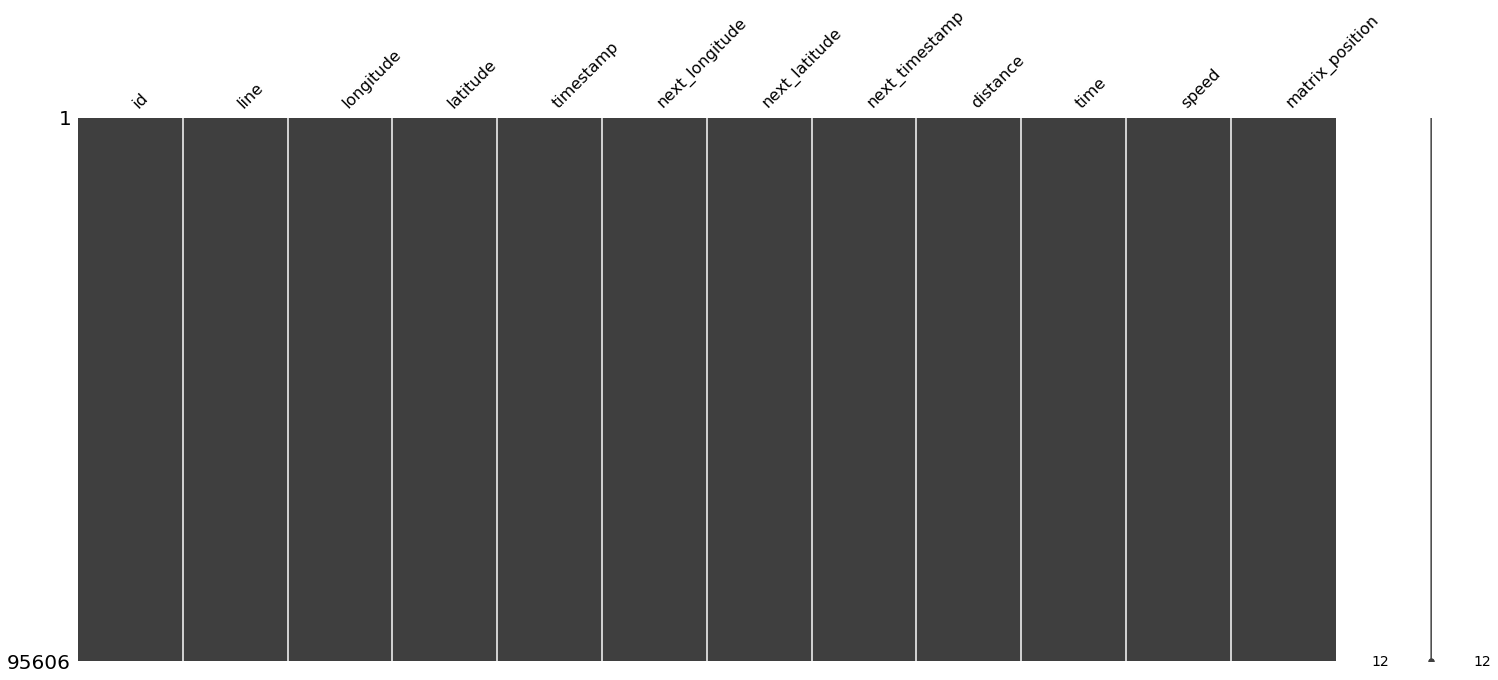

In [42]:
msn.matrix(data)

Vemos que no encuentra ningun missing value

Ahora buscamos outliers y para esto usamos un diagrama de `boxenplot` muy similar a un diagrama de caja _(boxplot)_

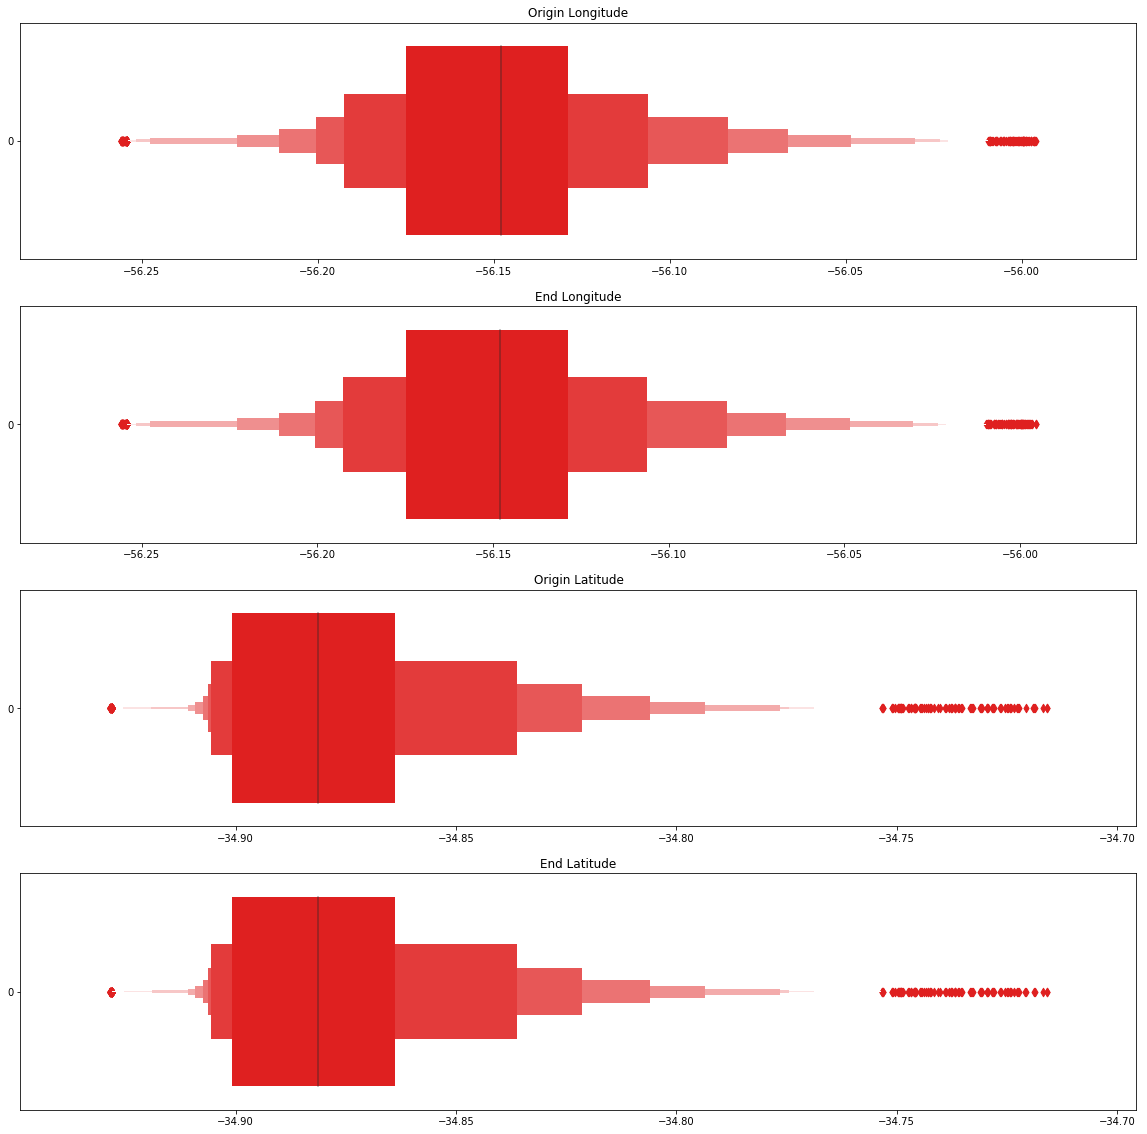

In [43]:
matplotlib.rcParams['figure.figsize'] = [20,20]
plt.subplot(411)
plt.title('Origin Longitude')
sns.boxenplot(data=data.longitude, orient='horizontal', color='red')
plt.subplot(412)
plt.title('End Longitude')
sns.boxenplot(data=data.next_longitude, orient='horizontal', color='red')
plt.subplot(413)
plt.title('Origin Latitude')
sns.boxenplot(data=data.latitude, orient='horizontal', color='red')
plt.subplot(414)
plt.title('End Latitude')
sns.boxenplot(data=data.next_latitude, orient='horizontal', color='red')

plt.show()

Podemos ver algunos datos que pueden ser considerados outliers pero como vimos en secciones anteriores estas son de la linea 142 que se aleja de la media de los datos dado que esta linea llega a Canelones.

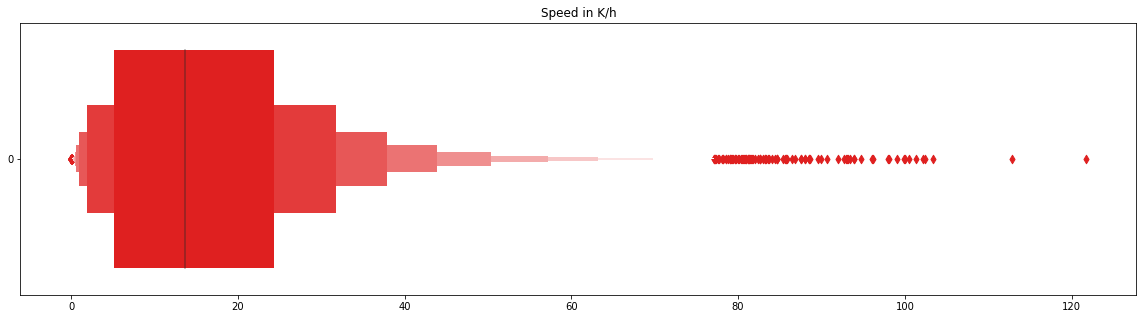

In [44]:
matplotlib.rcParams['figure.figsize'] = [20,5]
plt.title('Speed in K/h')
sns.boxenplot(data=data.speed.apply(lambda x: ms_to_kh(x)), orient='horizontal', color='red')

Las velocidades son razonables para los omnibus, los pocos casos en los que se llegan a altas velocidades pueden deberse a las zonas. Para comprobar esto vamos a ver cuales son las zonas en las cuales se llega a estas velocidades. Vamos a utilizar las velocidades superiores a 30 m/s (aproximadamente 108 k/h)

In [45]:
data.query('speed > 30')

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
2161,45,217,-56.182518,-34.882500,2018-10-02 15:37:55,-56.187200,-34.880733,2018-10-02 15:38:10,470.107551,0 days 00:00:15.000000000,31.340503,"[5, 8]"
21540,1015,343,-56.134140,-34.865665,2018-10-02 14:39:08,-56.135025,-34.870167,2018-10-02 14:39:23,507.068996,0 days 00:00:15.000000000,33.804600,"[7, 13]"


**-34.882500, -56.182518**

**-34.880733, -56.187200**

![speeds](./images/high_speeds.png)

**-34.865665, -56.134140**

**-34.870167, -56.135025**

![](./images/high_speeds_2.png)

Podemos ver que en estas calles se puede llegar a estas velocidades pero al ser casos muy particulares pueden afectar a nuestros modelos y por esto vamos a eliminarlos.

In [46]:
data.query('speed > 25').count()

id                 24
line               24
longitude          24
latitude           24
timestamp          24
next_longitude     24
next_latitude      24
next_timestamp     24
distance           24
time               24
speed              24
matrix_position    24
dtype: int64

Vamos a eliminar las 24 filas que tienen datos con velocidades superiores a 25 m/s _(90 K/h)_

In [47]:
data = data.query('speed < 25')

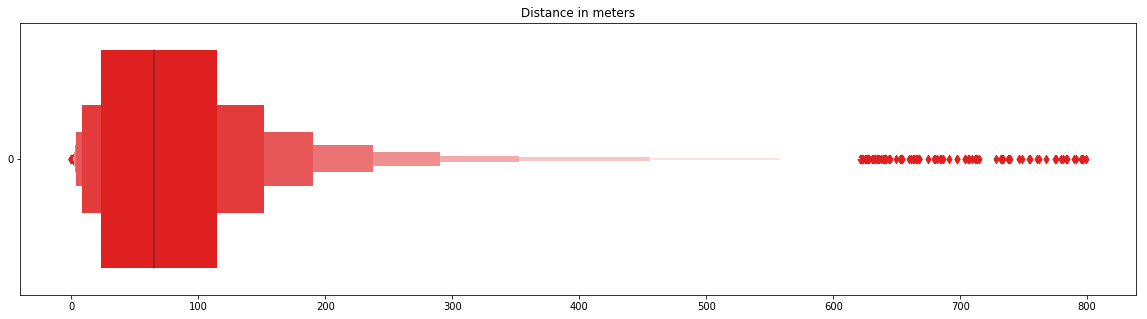

In [48]:
matplotlib.rcParams['figure.figsize'] = [20,5]
plt.title('Distance in meters')
sns.boxenplot(data=data.distance, orient='horizontal', color='red')

Ahora vamos a ver donde caen las largas distancias

In [49]:
data.query('distance > 795')

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
23232,79,343,-56.162167,-34.891666,2018-10-02 17:12:12,-56.166306,-34.897972,2018-10-02 17:13:27,796.348669,0 days 00:01:15.000000000,10.617982,"[4, 10]"
58060,709,342,-56.165670,-34.897305,2018-10-02 16:37:11,-56.161472,-34.891000,2018-10-02 16:38:11,798.817304,0 days 00:01:00.000000000,13.313622,"[4, 10]"
63679,241,7516,-56.253967,-34.895500,2018-10-02 15:45:25,-56.248085,-34.890217,2018-10-02 15:54:25,795.540435,0 days 00:09:00.000000000,1.473223,"[4, 1]"


**-34.891666, -56.162167**

**-34.897972, -56.166306**

![](./images/large_distances.png)
- - - - - - - - - - - - - -

**-34.897305, -56.165670**

**-34.891000, -56.161472**

![](./images/large_distances2.png)
- - - - - - - - - - - - - -

**-34.895500, -56.253967**

**-34.890217, -56.248085**

![](./images/large_distances3.png)

En el primer caso podemos ver que esa distancia no afectaria mucho, por otra parte la segunda distancia tiene forma de distancia Manhattan

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/02436c34fc9562eb170e2e2cfddbb3303075b28e)

En este caso nuestra distancia se ve afectada porque estamos usando la distancia haversine que se calcula como:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d9bdd722860b46cf459e01fe0108fa1f45f13fd6)

Vamos a tener que ver hasta que punto son tolerables largas distancias.

In [50]:
data.query('distance > 500').head(5)

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
47,76,217,-56.098970,-34.872250,2018-10-02 16:17:41,-56.106632,-34.870285,2018-10-02 16:19:56,732.347979,0 days 00:02:15.000000000,5.424800,"[6, 16]"
167,76,217,-56.180183,-34.883415,2018-10-02 16:56:56,-56.187466,-34.880634,2018-10-02 16:59:42,732.776170,0 days 00:02:46.000000000,4.414314,"[5, 8]"
867,13,217,-56.211582,-34.862534,2018-10-02 14:50:38,-56.217250,-34.858566,2018-10-02 14:51:23,679.795382,0 days 00:00:45.000000000,15.106564,"[7, 5]"
2275,45,217,-56.100100,-34.872032,2018-10-02 17:35:27,-56.106033,-34.870483,2018-10-02 17:36:27,568.004185,0 days 00:01:00.000000000,9.466736,"[6, 16]"
2461,34,217,-56.212017,-34.862350,2018-10-02 15:32:24,-56.216835,-34.859050,2018-10-02 15:33:09,572.618527,0 days 00:00:45.000000000,12.724856,"[7, 5]"


**-34.870285, -56.106632**

**-34.872250, -56.098970**

![Large Distance](./images/large_distances4.png)

**-34.883415, -56.180183**

**-34.880634, -56.187466**

![Large Distance](./images/large_distances5.png)


**-34.859050, -56.216835**

**-34.862350, -56.212017**

![Large Distance](./images/large_distances6.png)

Parece que estas largas distancias son el linea recta a velocidades superiores a la media, por temas de simplicidad vamosa suponer que esto es asi.

In [51]:
data = data.query('distance <= 500')

Como ya terminamos de preparar nuestros datos vamos a realizar un ultimo cambio, vamos a convertir los tiempos de datetimes a segundos en int32.

In [52]:
print('\nTime as date')
data.head()


Time as date


,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53,-56.222717,-34.855766,2018-10-02 14:39:23,31.807877,0 days 00:00:30.000000000,1.060263,"[8, 4]"
1,76,217,-56.222717,-34.855766,2018-10-02 14:39:23,-56.222733,-34.855780,2018-10-02 14:39:53,2.134200,0 days 00:00:30.000000000,0.071140,"[8, 4]"
2,76,217,-56.222733,-34.855780,2018-10-02 14:39:53,-56.222916,-34.855682,2018-10-02 14:40:08,19.939152,0 days 00:00:15.000000000,1.329277,"[8, 4]"
3,76,217,-56.222916,-34.855682,2018-10-02 14:40:08,-56.222866,-34.855682,2018-10-02 14:40:23,4.562295,0 days 00:00:15.000000000,0.304153,"[8, 4]"
4,76,217,-56.222866,-34.855682,2018-10-02 14:40:23,-56.222850,-34.855667,2018-10-02 14:40:38,2.216614,0 days 00:00:15.000000000,0.147774,"[8, 4]"


In [53]:
line_times = []
for row in data.itertuples():
    start_time = datetime.strptime(row.timestamp,'%Y-%m-%d %H:%M:%S')
    end_time   = datetime.strptime(row.next_timestamp,'%Y-%m-%d %H:%M:%S')
    time = end_time - start_time
    line_times.append(time.total_seconds())

data['time']  = line_times

In [55]:
print('\nTime in seconds int32')
data.head()


Time in seconds int32


,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
0,76,217,-56.222400,-34.855885,2018-10-02 14:38:53,-56.222717,-34.855766,2018-10-02 14:39:23,31.807877,30.0,1.060263,"[8, 4]"
1,76,217,-56.222717,-34.855766,2018-10-02 14:39:23,-56.222733,-34.855780,2018-10-02 14:39:53,2.134200,30.0,0.071140,"[8, 4]"
2,76,217,-56.222733,-34.855780,2018-10-02 14:39:53,-56.222916,-34.855682,2018-10-02 14:40:08,19.939152,15.0,1.329277,"[8, 4]"
3,76,217,-56.222916,-34.855682,2018-10-02 14:40:08,-56.222866,-34.855682,2018-10-02 14:40:23,4.562295,15.0,0.304153,"[8, 4]"
4,76,217,-56.222866,-34.855682,2018-10-02 14:40:23,-56.222850,-34.855667,2018-10-02 14:40:38,2.216614,15.0,0.147774,"[8, 4]"


In [56]:
data.to_csv('../data/dataset.csv')